# Retail Data & Cohort Analysis for Customer Insights #
## Objective:
The primary objective of this project is to analyze retail transaction data to gain insights into customer purchasing behavior, product sales performance, and revenue trends. By leveraging Python for data analysis, we aim to:
+ Identifying Sales Trends Over Time
+ Understanding Customer Behavior by Different Age Groups and Purchase Patterns
+ Uncovering Seasonal Trends in Sales to Optimize Inventory Planning
+ Analyzing Revenue Growth and Developing Strategies for Business Improvement
## Dataset Overview:
This dataset contains detailed retail transactions, including:

`Transaction_ID`: Unique identifier for each transaction.

`Customer_ID`: Unique identifier for each customer.

`Name`: Name of the customer.

`Email`: Email address of the customer.

`Phone`: Phone number of the customer.

`Address`: Address of the customer.

`City`:City where the customer resides.

`State`: State where the customer resides.

`Zipcode`: Zip code of the customer's address.

`Country`: Country where the customer resides.

`Age`: Age of the customer.

`Gender`: Gender of the customer.

`Income`: Income level of the customer.

`Customer_Segment`: Segment of the customer (e.g., Premium, Regular, New).

`Year`: Year component extracted from the purchase date.

`Month`: Month component extracted from the purchase date.

`Date`: Date component extracted from the purchase date.

`Time`: Time component extracted from the purchase date.

`Total_Purchases`: Total number of purchases made by the customer.

`Amount`: Amount spent in a single transaction.

`Total_Amount`: Total amount spent by the customer (calculated as Amount * Total_Purchases).

`Product_Category`: Category of the purchased product.

`Product_Brand`: Brand of the purchased product.

`Product_Type`: Type of the purchased product.

`Feedback`: Feedback provided by the customer on the purchase.

`Shipping_Method`: Method used for shipping the product.

`Payment_Method`: Method used for payment.

`Order_Status`: Status of the order (e.g., Pending, Processing, Shipped, Delivered).

`products`: list of different products

`Ratings` : ratings given by customers on different products.


 ## Data Cleaning & Preprocessing

After importing the necessary libraries, let's get started by loading the dataset into a Pandas DataFrame. This allows us to explore its structure and identify any missing values.

In [260]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import datetime, timedelta
import requests
from key import key_API

In [261]:
retail=pd.read_csv('new_retail_data.csv')
retail.head()

,Unnamed: 0,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,...,64.83,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,...,161.34,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,...,212.70,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,...,493.36,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,...,49.72,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [262]:
# Check info of dataframe
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        302010 non-null  int64  
 1   Transaction_ID    301677 non-null  float64
 2   Customer_ID       301702 non-null  float64
 3   Name              301628 non-null  object 
 4   Email             301663 non-null  object 
 5   Phone             301648 non-null  float64
 6   Address           301695 non-null  object 
 7   City              301762 non-null  object 
 8   State             301729 non-null  object 
 9   Zipcode           301670 non-null  float64
 10  Country           301739 non-null  object 
 11  Age               301837 non-null  float64
 12  Gender            301693 non-null  object 
 13  Income            301720 non-null  object 
 14  Customer_Segment  301795 non-null  object 
 15  Date              301651 non-null  object 
 16  Year              30

There are 302010 entries with missing values for most columns. Firstly, we can drop the unnecessary column `Unnamed: 0`.

In [263]:
# Creat dataframe retail_copy as backup
retail_copy= retail

# Drop  the unnecessary column 
retail=retail.drop(columns='Unnamed: 0')

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

We can convert data types for all columns and check the number of null values and remove duplicated transactions in dataset

In [264]:
# Convert columns to datatype 
retail[["Transaction_ID", "Customer_ID", "Phone", "Age", "Year", "Month"]] = retail[
    ["Transaction_ID", "Customer_ID", "Phone", "Age", "Year", "Month"]
].apply(pd.to_numeric, errors="coerce").astype("Int64")

# Convert columns to datatype date time
retail['Date'] = pd.to_datetime(retail['Date'], errors="coerce")
retail['Time'] = pd.to_timedelta(retail['Time'], errors="coerce" )

In [265]:
# Count null values in each column
null_counts = retail.isnull().sum()

# Print total rows and null values per column
print(f"Total rows: {retail.shape[0]}\nTotal null values in each column:\n{null_counts}")

Total rows: 302010
Total null values in each column:
Transaction_ID         333
Customer_ID            308
Name                   382
Email                  347
Phone                  362
Address                315
City                   248
State                  281
Zipcode                340
Country                271
Age                    173
Gender                 317
Income                 290
Customer_Segment       215
Date                   359
Year                   350
Month               302010
Time                   350
Total_Purchases        361
Amount                 357
Total_Amount           718
Product_Category       283
Product_Brand          281
Product_Type             0
Feedback               184
Shipping_Method        337
Payment_Method         297
Order_Status           235
Ratings                184
products                 0
dtype: int64


We continue to exclude the duplicated transactions in the dataset. 

Since most of the columns contain null values below 0.12%, they may not significantly impact the analysis. However, we should still clean the data and ensure its validity for numeric and object values

In [266]:
#check duplicated values with the same transaction_ID
transaction_dup = retail[retail.duplicated(subset=['Transaction_ID', 'Customer_ID', 'Time', 'Total_Amount'], keep=False)]
transaction_dup = transaction_dup.sort_values(by='Transaction_ID')
transaction_dup


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
165944,1005039,84239,John Tate,Andrea27@gmail.com,9064050806,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,...,222.84,Grocery,Coca-Cola,Water,Bad,Same-Day,Debit Card,Pending,1.0,Flavored water
301783,1005039,84239,John Tate,Andrea27@gmail.com,9064050806,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,...,222.84,Grocery,Coca-Cola,Water,Bad,Same-Day,Cash,Pending,1.0,Sparkling water
300651,1010919,12847,Tyler Ward,Louis68@gmail.com,4553740081,945 Justin Street,Vancouver,Ontario,79443.0,Canada,...,272.34,Electronics,Samsung,Television,Good,Same-Day,Cash,Delivered,3.0,LED TV
273886,1010919,12847,Tyler Ward,Louis68@gmail.com,4553740081,945 Justin Street,Vancouver,Ontario,79443.0,Canada,...,272.34,Electronics,Samsung,Television,Good,Same-Day,Credit Card,Delivered,3.0,LED TV
300395,1019366,21198,Timothy Montgomery,Cynthia36@gmail.com,8622074664,385 Gabrielle Estate,Winnipeg,Ontario,69618.0,Canada,...,283.45,Grocery,Nestle,Snacks,Excellent,Express,Credit Card,Shipped,4.0,Cheese snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197673,<NA>,85591,James Marks,Michael75@gmail.com,2827518529,72381 Montgomery Port Apt. 474,Kelowna,Ontario,9559.0,Canada,...,123.69,Grocery,Coca-Cola,Water,Average,Same-Day,PayPal,Processing,2.0,Spring water
273042,<NA>,64777,Hannah Jones DDS,Charles91@gmail.com,6617422636,726 David Ranch Suite 108,Munich,Berlin,92588.0,Germany,...,250.28,Grocery,Coca-Cola,Juice,Bad,Express,Debit Card,Pending,1.0,Orange juice
300351,<NA>,64777,Hannah Jones DDS,Charles91@gmail.com,6617422636,726 David Ranch Suite 108,Munich,Berlin,92588.0,Germany,...,250.28,Grocery,Coca-Cola,Juice,Bad,Express,Credit Card,Pending,1.0,Grapefruit juice
301037,<NA>,85591,James Marks,Michael75@gmail.com,2827518529,72381 Montgomery Port Apt. 474,Kelowna,Ontario,9559.0,Canada,...,123.69,Grocery,Coca-Cola,Water,Average,Same-Day,Cash,Processing,2.0,Artesian water


In [267]:
retail_after_dup=retail.drop_duplicates(subset=['Transaction_ID', 'Customer_ID', 'Time', 'Total_Amount'])
retail_after_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299657 entries, 0 to 299656
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Transaction_ID    299327 non-null  Int64          
 1   Customer_ID       299353 non-null  Int64          
 2   Name              299278 non-null  object         
 3   Email             299311 non-null  object         
 4   Phone             299297 non-null  Int64          
 5   Address           299343 non-null  object         
 6   City              299412 non-null  object         
 7   State             299380 non-null  object         
 8   Zipcode           299320 non-null  float64        
 9   Country           299390 non-null  object         
 10  Age               299485 non-null  Int64          
 11  Gender            299341 non-null  object         
 12  Income            299371 non-null  object         
 13  Customer_Segment  299444 non-null  object        

In this dataset, there are missing values of `Transaction_ID` so we can reset transaction_ID by getting the values of index as unique indentifier to create a new column `Transaction_ID_new` for transaction counting of further analysis.

In [268]:
retail_old_transaction_id=retail_after_dup.copy()
retail_after_dup['Transaction_ID_new'] = retail_after_dup.index
retail_after_dup.head()
retail_after_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299657 entries, 0 to 299656
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Transaction_ID      299327 non-null  Int64          
 1   Customer_ID         299353 non-null  Int64          
 2   Name                299278 non-null  object         
 3   Email               299311 non-null  object         
 4   Phone               299297 non-null  Int64          
 5   Address             299343 non-null  object         
 6   City                299412 non-null  object         
 7   State               299380 non-null  object         
 8   Zipcode             299320 non-null  float64        
 9   Country             299390 non-null  object         
 10  Age                 299485 non-null  Int64          
 11  Gender              299341 non-null  object         
 12  Income              299371 non-null  object         
 13  Customer_Segment   

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\2429157586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_after_dup['Transaction_ID_new'] = retail_after_dup.index


After removing duplicated transactions, the total number of entries is 299,657. Now, we can proceed with examining numerical and object columns to check for data validity and ensure data consistency.

+ **Numeric values**

In [269]:
# check the litercy data
retail_after_dup.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Ratings,Transaction_ID_new
count,299327.0,299353.0,299297.0,299320.000000,299485.0,299300,299308.0,0.0,299311,299298.000000,299305.000000,298946.000000,299475.000000,299657.000000
mean,5495310.668874,55004.329805,5500797760.045309,50299.805429,35.409984,2023-08-30 15:31:18.543267328,2023.165051,<NA>,0 days 12:00:17.447962153,5.361075,51.036669,273.629473,3.165907,149828.000000
min,1000007.0,10000.0,1000049414.0,501.000000,18.0,2023-03-01 00:00:00,2023.0,<NA>,0 days 00:00:00,1.000000,2.000000,2.000000,1.000000,0.000000
25%,3247183.5,32468.0,3254631253.0,25425.000000,22.0,2023-05-31 00:00:00,2023.0,<NA>,0 days 06:01:50,3.000000,26.580000,87.840000,2.000000,74914.000000
50%,5498743.0,55007.0,5504515105.0,50599.000000,32.0,2023-08-31 00:00:00,2023.0,<NA>,0 days 11:59:32,5.000000,51.090000,208.350000,3.000000,149828.000000
75%,7739003.0,77505.0,7749351018.0,75265.000000,46.0,2023-11-30 00:00:00,2023.0,<NA>,0 days 18:00:02.500000,8.000000,75.540000,406.100000,4.000000,224742.000000
max,9999995.0,99999.0,9999996122.0,99949.000000,70.0,2024-02-29 00:00:00,2024.0,<NA>,0 days 23:59:59,10.000000,100.000000,999.900000,5.000000,299656.000000
std,2595706.912427,26006.621465,2595917989.711939,28975.409909,14.999393,NaN,0.371227,<NA>,0 days 06:54:55.463565868,2.868502,28.277871,225.811753,1.319742,86503.669145


All columns containing numeric values is valid except the months. We can check the data of `month` column and convert it to right format from column `Date`.

In [270]:
# assign month column by extract month from date column
retail_after_dup = retail_after_dup.assign(Month=retail_after_dup['Date'].dt.month)
retail_after_dup.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Ratings,Transaction_ID_new
count,299327.0,299353.0,299297.0,299320.000000,299485.0,299300,299308.0,299300.000000,299311,299298.000000,299305.000000,298946.000000,299475.000000,299657.000000
mean,5495310.668874,55004.329805,5500797760.045309,50299.805429,35.409984,2023-08-30 15:31:18.543267328,2023.165051,6.505075,0 days 12:00:17.447962153,5.361075,51.036669,273.629473,3.165907,149828.000000
min,1000007.0,10000.0,1000049414.0,501.000000,18.0,2023-03-01 00:00:00,2023.0,1.000000,0 days 00:00:00,1.000000,2.000000,2.000000,1.000000,0.000000
25%,3247183.5,32468.0,3254631253.0,25425.000000,22.0,2023-05-31 00:00:00,2023.0,4.000000,0 days 06:01:50,3.000000,26.580000,87.840000,2.000000,74914.000000
50%,5498743.0,55007.0,5504515105.0,50599.000000,32.0,2023-08-31 00:00:00,2023.0,7.000000,0 days 11:59:32,5.000000,51.090000,208.350000,3.000000,149828.000000
75%,7739003.0,77505.0,7749351018.0,75265.000000,46.0,2023-11-30 00:00:00,2023.0,10.000000,0 days 18:00:02.500000,8.000000,75.540000,406.100000,4.000000,224742.000000
max,9999995.0,99999.0,9999996122.0,99949.000000,70.0,2024-02-29 00:00:00,2024.0,12.000000,0 days 23:59:59,10.000000,100.000000,999.900000,5.000000,299656.000000
std,2595706.912427,26006.621465,2595917989.711939,28975.409909,14.999393,NaN,0.371227,3.451564,0 days 06:54:55.463565868,2.868502,28.277871,225.811753,1.319742,86503.669145


+ **Object values**

For better understanding of customer information, check data on 3 columns: `Customer_ID`, `Name`, `Email` to figure out the unique identifier for customers.

In [271]:
# How many Customer name for each ID? 
retail_after_dup.groupby('Customer_ID')['Name'].nunique()

Customer_ID
10000    4
10001    5
10002    5
10003    2
10004    2
        ..
99995    8
99996    4
99997    4
99998    5
99999    2
Name: Name, Length: 86766, dtype: int64

In [272]:
retail_after_dup[retail_after_dup['Customer_ID']==10000]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Transaction_ID_new
145221,4340470,10000,Thomas Thompson,Christy6@gmail.com,6640432656,719 Kevin Route,San Francisco,Maine,87288.0,USA,...,Clothing,Nike,Shorts,Good,Same-Day,Cash,Delivered,3.0,Khaki shorts,145221
231852,8180050,10000,John Patterson,Victoria5@gmail.com,6855934982,136 Perkins Street,Phoenix,North Carolina,28468.0,USA,...,Grocery,Coca-Cola,Water,Excellent,Same-Day,PayPal,Delivered,5.0,Sparkling water,231852
290160,4759669,10000,Robert Cook,Caroline60@gmail.com,8428883216,232 Lawrence Greens,San Antonio,Nevada,89220.0,USA,...,Electronics,Samsung,Tablet,Average,Express,Debit Card,Pending,2.0,Amazon Fire Tablet,290160
297459,8901617,10000,Teresa Cole,Molly61@gmail.com,3057277425,14721 Robert Glen Apt. 663,Hamburg,Berlin,56734.0,Germany,...,Home Decor,Bed Bath & Beyond,Bedding,Good,Express,Credit Card,Delivered,4.0,Quilt,297459


As we can see, 1 `customer_ID` can represent more than 1 customer name. Therefore, there are data errors in column `Customer_ID`.
For example, `Customer ID` = 10000, there are four different records with varying personal information, including gender, address, and country. Since these columns do not consistently represent a single customer, they can be dropped.

To determine a more reliable unique identifier, we can continue with other columns, such as email and phone, to identify which one can best serve as Customer_ID. These inconsistencies may have arisen due to errors during data transformation, extraction, or integration from different sources and countries.

In [273]:
# How many Customer_ID for each email?
retail_after_dup.groupby('Email')['Customer_ID'].nunique()

Email
Aaron100@gmail.com    11
Aaron10@gmail.com     11
Aaron11@gmail.com     13
Aaron12@gmail.com     10
Aaron13@gmail.com      7
                      ..
Zoe93@gmail.com        1
Zoe95@gmail.com        1
Zoe96@gmail.com        2
Zoe97@gmail.com        1
Zoe99@gmail.com        1
Name: Customer_ID, Length: 52897, dtype: int64

In [274]:
retail_after_dup[retail_after_dup['Email']=='Aaron100@gmail.com']

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Transaction_ID_new
23996,9978720,63206,Jamie Banks,Aaron100@gmail.com,8836691331,74572 Phelps Cove,Frankfurt,Berlin,49420.0,Germany,...,Books,Random House,Non-Fiction,Good,Same-Day,Cash,Delivered,4.0,Self-help,23996
39928,9987384,64140,Ryan Taylor,Aaron100@gmail.com,4746645530,293 Chapman Plains Apt. 334,Gold Coast,New South Wales,42706.0,Australia,...,Electronics,Sony,Headphones,Good,Same-Day,Debit Card,Delivered,4.0,Studio headphones,39928
42033,9505109,79076,Susan Sherman,Aaron100@gmail.com,1939062028,17506 Kyle Estates,Austin,Missouri,63341.0,USA,...,Home Decor,Home Depot,Furniture,Bad,Same-Day,Cash,Delivered,1.0,Bookshelf,42033
50985,8613091,95638,Marie Thomas,Aaron100@gmail.com,1914426767,8527 Jacob Centers Suite 797,El Paso,Minnesota,55028.0,USA,...,Grocery,Nestle,Coffee,Excellent,Same-Day,Cash,Shipped,5.0,Latte,50985
79623,1223726,91267,Justin Hicks,Aaron100@gmail.com,6119333314,44495 Jennifer Expressway Suite 535,Chicago,Connecticut,22574.0,USA,...,Grocery,Coca-Cola,Juice,Good,Same-Day,Debit Card,Processing,3.0,Pomegranate juice,79623
118279,6707977,38187,Megan Mcclure,Aaron100@gmail.com,2993174227,9829 Steve Rest Apt. 342,Brighton,England,57414.0,UK,...,Home Decor,IKEA,Decorations,Excellent,Standard,Cash,Delivered,5.0,Rugs,118279
141084,8012070,48989,April Gonzalez,Aaron100@gmail.com,2530899598,201 Wright Groves,San Francisco,Maine,65749.0,USA,...,Electronics,Whirepool,Fridge,Good,Express,Cash,Delivered,4.0,Black refrigerator,141084
145791,2606182,94662,Brandon Bird,Aaron100@gmail.com,9695303644,87515 Emma Lakes,San Francisco,Maine,64140.0,USA,...,Grocery,Coca-Cola,Soft Drink,Bad,Same-Day,Credit Card,Delivered,1.0,Root beer,145791
250221,7690689,73404,Jose Osborn,Aaron100@gmail.com,9617769767,4372 Jackson Rest,Montreal,Ontario,23784.0,Canada,...,Electronics,Sony,Headphones,Good,Standard,Credit Card,Processing,4.0,Sports headphones,250221
257328,9472020,30611,Sharon Patterson,Aaron100@gmail.com,7266164461,462 King Pines,Barrie,Ontario,76191.0,Canada,...,Electronics,Apple,Laptop,Good,Express,Cash,Shipped,4.0,HP Spectre,257328


Based on the retrieved data, Customer_ID cannot uniquely represent a customer because multiple customer names are associated with the same Customer_ID. Additionally, the email Aaron100@gmail.com appears in 11 entries, representing 11 different individuals from different backgrounds. Therefore, email cannot be considered a unique identifier for a customer.

In [275]:
retail_after_dup.groupby('Phone')['Customer_ID'].nunique().sort_values(ascending=False)


Phone
2193623227    2
5727061913    2
1000280050    1
1000282596    1
1000310717    1
             ..
9785632402    0
9851877108    0
9862314146    0
9955698897    0
9967933487    0
Name: Customer_ID, Length: 299295, dtype: int64

In [276]:
retail_after_dup.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products', 'Transaction_ID_new'],
      dtype='object')

Not all three columns can serve as unique identifiers for customers. In this context, we need to investigate the data dictionary further and seek more information from the data engineering team. In my assumption, to ensure diversity of further analysis, we consider `Customer_ID` as the unique identifier. For any duplicate Customer_ID values, we will retain only the first occurrence to represent the customer's information. Next, we will update all relevant customer-related columns, including `Name`,`Email`, `Phone`,`Address`, `City`,`State`, `Zipcode`, `Country`,`Age`,`Gender`, `Income`,`Customer_Segment`

In [277]:
customer_info=retail_after_dup[['Customer_ID','Name','Email','Phone','Address','City','State','Zipcode', 'Country','Age', 'Gender', 'Income','Customer_Segment']]

In [278]:
#create a backup data
customer_info_copy=customer_info.copy()
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299657 entries, 0 to 299656
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       299353 non-null  Int64  
 1   Name              299278 non-null  object 
 2   Email             299311 non-null  object 
 3   Phone             299297 non-null  Int64  
 4   Address           299343 non-null  object 
 5   City              299412 non-null  object 
 6   State             299380 non-null  object 
 7   Zipcode           299320 non-null  float64
 8   Country           299390 non-null  object 
 9   Age               299485 non-null  Int64  
 10  Gender            299341 non-null  object 
 11  Income            299371 non-null  object 
 12  Customer_Segment  299444 non-null  object 
dtypes: Int64(3), float64(1), object(9)
memory usage: 32.9+ MB


In [279]:
# remove duplicate and keep the first occurrence to update customer info for dataset
customer_data=customer_info.drop_duplicates(subset='Customer_ID',keep='first')
customer_data['Customer_ID'].nunique()

86766

In [280]:
# double check with number of unique customer_ID
retail_after_dup['Customer_ID'].nunique()

86766

In [281]:
list_column = ['Name', 'Email','Phone', 'Address', 'City', 'State', 'Zipcode', 
               'Country', 'Age', 'Gender', 'Income', 'Customer_Segment']
#merge 2 dataframe to update 
new_retail=pd.merge(retail_after_dup, customer_data, on='Customer_ID', how='left', suffixes=('_old', '_new'))

# create a backup after merge
new_retail_copy=new_retail.copy()

# Get the list of columns with '_old' suffix
columns_to_drop = [col for col in new_retail.columns if col.endswith('_old')]

# drop columns to get updated columns after merge
new_retail.drop(columns=columns_to_drop, inplace=True)

new_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299657 entries, 0 to 299656
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Transaction_ID        299327 non-null  Int64          
 1   Customer_ID           299353 non-null  Int64          
 2   Date                  299300 non-null  datetime64[ns] 
 3   Year                  299308 non-null  Int64          
 4   Month                 299300 non-null  float64        
 5   Time                  299311 non-null  timedelta64[ns]
 6   Total_Purchases       299298 non-null  float64        
 7   Amount                299305 non-null  float64        
 8   Total_Amount          298946 non-null  float64        
 9   Product_Category      299377 non-null  object         
 10  Product_Brand         299378 non-null  object         
 11  Product_Type          299657 non-null  object         
 12  Feedback              299475 non-null  objec

After merging, the total number of entries remains 299,657. However, we will double-check the number of updated values by counting values for the updated columns that are greater than 1, meaning there are more than 1 value for each Customer_ID.

In [282]:
# Define columns to check for updates
columns_to_check = ['Name_new', 'Email_new', 'Phone_new', 'Address_new', 
                    'City_new', 'State_new', 'Zipcode_new', 'Country_new', 
                    'Age_new', 'Gender_new', 'Income_new', 'Customer_Segment_new']

# Group by Customer_ID and check for duplicates
for i in columns_to_check:
    count_check = new_retail.groupby('Customer_ID')[i].nunique()
    
    # Find customers with more than one unique value
    duplicated_customers = count_check[count_check.gt(1)].index
    
    # Count the number of customer_ID having duplicated valuesvalues
    if len(duplicated_customers) > 0:
        print(f'Column {i}: {len(duplicated_customers)} customers have duplicated values: {duplicated_customers.tolist()}')
    else: 
        print(f'Column {i}: Successfully Updated')

Column Name_new: Successfully Updated
Column Email_new: Successfully Updated
Column Phone_new: Successfully Updated
Column Address_new: Successfully Updated
Column City_new: Successfully Updated
Column State_new: Successfully Updated
Column Zipcode_new: Successfully Updated
Column Country_new: Successfully Updated
Column Age_new: Successfully Updated
Column Gender_new: Successfully Updated
Column Income_new: Successfully Updated
Column Customer_Segment_new: Successfully Updated


In [283]:
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299657 entries, 0 to 299656
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Transaction_ID        299327 non-null  Int64          
 1   Customer_ID           299353 non-null  Int64          
 2   Date                  299300 non-null  datetime64[ns] 
 3   Year                  299308 non-null  Int64          
 4   Month                 299300 non-null  float64        
 5   Time                  299311 non-null  timedelta64[ns]
 6   Total_Purchases       299298 non-null  float64        
 7   Amount                299305 non-null  float64        
 8   Total_Amount          298946 non-null  float64        
 9   Product_Category      299377 non-null  object         
 10  Product_Brand         299378 non-null  object         
 11  Product_Type          299657 non-null  object         
 12  Feedback              299475 non-null  objec

To fill the missing values in the Country column, we can define a function that takes city and state as parameters, queries an API to fetch the corresponding country, and updates the dataset accordingly.

In [284]:
def geocode_city_state(city_name, state_name=None):
    # Base URL for OpenCage Geocoder API
    url = "https://api.opencagedata.com/geocode/v1/json"
    
    # If state name is provided, combine city and state in the query
    if state_name:
        query = f"{city_name}, {state_name}"
    else:
        query = city_name
    
    # Parameters for the API request
    params = {
        'q': query,                # Combine city and state if state is given
        'key': key_API,            # API key
        'no_annotations': 1,       # Optional: Remove extra annotations from the response
        'language': 'en',          # Optional: Get results in English
    }

    # Send the GET request to OpenCage API
    response = requests.get(url, params=params)

    # If the request is successful, status code 200
    if response.status_code == 200:
        data = response.json()  # Parse the JSON response

        # Check if any results were returned
        if data['results']:
            country = data['results'][0]['components'].get('country', 'Country not found')
            return country
    else:
        return 'Unknown'

# Example usage with both city and state
city = 'San Francisco'
state = 'California'
country = geocode_city_state(city, state)

print(f"The country for {city}, {state} is {country}")

The country for San Francisco, California is United States


In [285]:
# Filter rows where 'Country' is null
null_country = new_retail[new_retail['Country_new'].isnull()]

# Apply the geocode_city_state function to both 'City' and 'State' columns and fill the 'Country' column
null_country['Country_new'] = null_country.apply(
    lambda row: geocode_city_state(row['City_new'], row['State_new']) if pd.notnull(row['City_new']) and pd.notnull(row['State_new']) else 'Unknown',
    axis=1
)

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\3960995523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_country['Country_new'] = null_country.apply(


In [286]:
null_country.head()

,Transaction_ID,Customer_ID,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,...,Phone_new,Address_new,City_new,State_new,Zipcode_new,Country_new,Age_new,Gender_new,Income_new,Customer_Segment_new
33519,3115974,68288,2023-03-01,2023,3.0,0 days 12:27:46,7.0,79.43,556.01,Grocery,...,5953061211,51878 Carlos Walks,Berlin,Berlin,55693.0,Germany,22,Female,Low,Regular
33587,3894419,93390,2023-10-13,2023,10.0,0 days 17:12:42,8.0,42.75,342.00,Clothing,...,7447925497,7424 Mcgrath Vista,Oshawa,Ontario,73391.0,Canada,22,Male,Low,Regular
34077,5164961,49487,2023-07-11,2023,7.0,0 days 20:52:26,9.0,15.80,142.20,Clothing,...,5990048000,204 Williams Loaf Apt. 769,Melbourne,New South Wales,588.0,Australia,22,Female,Low,Regular
35122,9052064,23325,2023-04-29,2023,4.0,0 days 18:30:26,7.0,72.16,505.12,Grocery,...,1888078230,907 Edward Courts Suite 128,Liverpool,England,6166.0,United Kingdom,22,Female,Medium,Regular
36947,1084441,49487,2023-11-30,2023,11.0,0 days 14:23:49,4.0,65.17,260.68,Home Decor,...,5990048000,204 Williams Loaf Apt. 769,Melbourne,New South Wales,588.0,Australia,22,Female,Low,Regular


In [287]:
# Check any missing values for country field
null_country[null_country['Country_new']=='Unknown']

,Transaction_ID,Customer_ID,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,...,Phone_new,Address_new,City_new,State_new,Zipcode_new,Country_new,Age_new,Gender_new,Income_new,Customer_Segment_new


In [288]:
#check size of dataframe null_country
null_country.shape

(209, 31)

In [289]:

# Copy data to avoid modifying the original DataFrames as backup
null_country_copy = null_country.copy()

# Create a mapping from Transaction_ID to Country
country_mapping = dict(zip(null_country['Transaction_ID_new'], null_country['Country_new']))

# Fill missing values in the 'Country' column of not_null_data_copy
new_retail['Country_new'] = new_retail['Country_new'].fillna(new_retail['Transaction_ID_new'].map(country_mapping))

#Check null counts in `Country_new` Column
new_retail['Country_new'].isnull().sum()

np.int64(0)

In [290]:
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299657 entries, 0 to 299656
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Transaction_ID        299327 non-null  Int64          
 1   Customer_ID           299353 non-null  Int64          
 2   Date                  299300 non-null  datetime64[ns] 
 3   Year                  299308 non-null  Int64          
 4   Month                 299300 non-null  float64        
 5   Time                  299311 non-null  timedelta64[ns]
 6   Total_Purchases       299298 non-null  float64        
 7   Amount                299305 non-null  float64        
 8   Total_Amount          298946 non-null  float64        
 9   Product_Category      299377 non-null  object         
 10  Product_Brand         299378 non-null  object         
 11  Product_Type          299657 non-null  object         
 12  Feedback              299475 non-null  objec

After updating the values in the `Country` column, we now have a refined dataset for further analysis. Since many columns contain missing values and there are total 299657 entries and 31 columns, handling missing data for each column can be challenging. Therefore, we can use subsets of the data for different purposes.

### Customer Demographic

For customer demographic, we will create `Age_Group` columns to categorize ages.

Because `Customer_ID` column is an unique identifer for customer, we will drop any rows with null values of that column.

In [291]:
# Define age bins and labels
bins = [0, 18, 23, 35, 50, 65, 100]  # Using 100 as the upper limit for 'above 60'
labels = ['0-17', '18-22', '23-34', '35-49', '50-64', 'Above 65']

# Create a new column 'Age_Group' based on the defined bins
new_retail['Age_Group'] = pd.cut(new_retail['Age_new'], bins=bins, labels=labels, right=False)

# Ensure 'Unknown' is a valid category
new_retail['Age_Group'] = new_retail['Age_Group'].cat.add_categories('Unknown')
# Fill in missing values in 'Age_Group' column with 'Unknown'
new_retail['Age_Group'] = new_retail['Age_Group'].fillna('Unknown')
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299657 entries, 0 to 299656
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Transaction_ID        299327 non-null  Int64          
 1   Customer_ID           299353 non-null  Int64          
 2   Date                  299300 non-null  datetime64[ns] 
 3   Year                  299308 non-null  Int64          
 4   Month                 299300 non-null  float64        
 5   Time                  299311 non-null  timedelta64[ns]
 6   Total_Purchases       299298 non-null  float64        
 7   Amount                299305 non-null  float64        
 8   Total_Amount          298946 non-null  float64        
 9   Product_Category      299377 non-null  object         
 10  Product_Brand         299378 non-null  object         
 11  Product_Type          299657 non-null  object         
 12  Feedback              299475 non-null  objec

For customer dataset, we will ignore missing values from specifics columns `Customer_ID`, `Age_Group`, `Gender_new`, `Income_new`, `Customer_Segment_new` to get subset from dataset.

In [292]:
#New subset of dataset: customer data
customer_df=new_retail[['Customer_ID','Age_Group','Gender_new', 'Country_new','Income_new', 'Customer_Segment_new']].dropna(subset=['Customer_ID'])

In [293]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299353 entries, 0 to 299656
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Customer_ID           299353 non-null  Int64   
 1   Age_Group             299353 non-null  category
 2   Gender_new            299009 non-null  object  
 3   Country_new           299353 non-null  object  
 4   Income_new            299172 non-null  object  
 5   Customer_Segment_new  299262 non-null  object  
dtypes: Int64(1), category(1), object(4)
memory usage: 14.3+ MB


We can fill missing values of columns `Gender_new` `Income_new`, `Customer_Segment_new` by `Unknown`. For the `Age_new`, we will categorize into different age groups.

In [294]:
customer_df[[ 'Gender_new', 'Income_new', 'Customer_Segment_new']]=customer_df[[ 'Gender_new', 'Income_new', 'Customer_Segment_new']].fillna('Unknown')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299353 entries, 0 to 299656
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Customer_ID           299353 non-null  Int64   
 1   Age_Group             299353 non-null  category
 2   Gender_new            299353 non-null  object  
 3   Country_new           299353 non-null  object  
 4   Income_new            299353 non-null  object  
 5   Customer_Segment_new  299353 non-null  object  
dtypes: Int64(1), category(1), object(4)
memory usage: 14.3+ MB


C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\257855966.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_count_by_age=customer_df.groupby('Age_Group')['Customer_ID'].nunique()
C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\257855966.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=customer_count_by_age.index, x=customer_count_by_age.values,


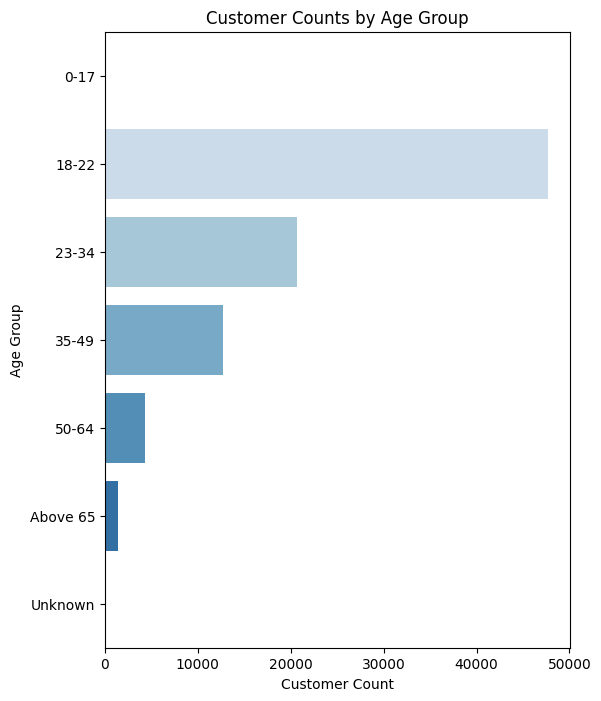

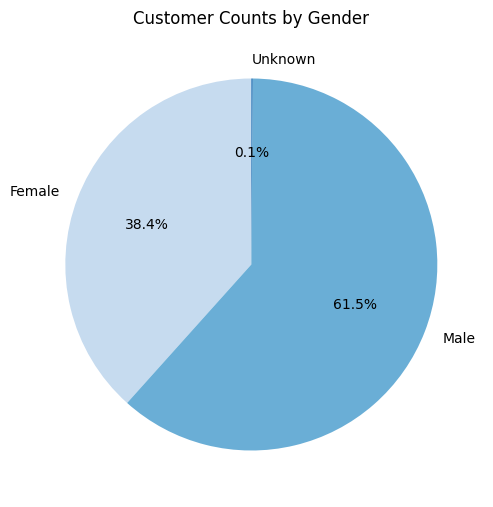

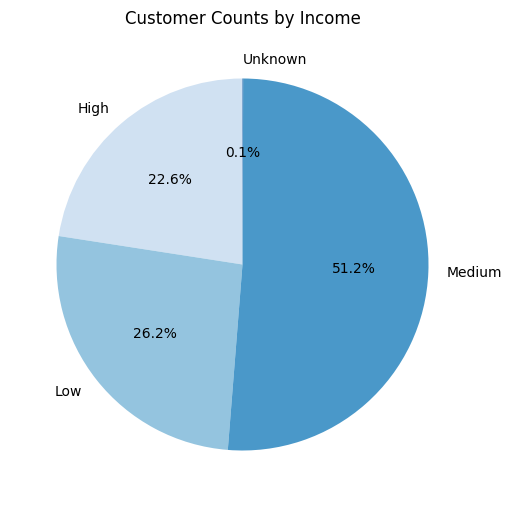

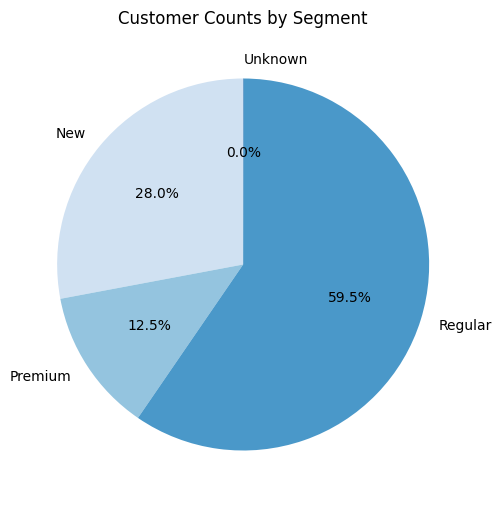

In [295]:
#Visualization customer by  Age_Group, Gender, Income, Country, Customer_Segment
customer_count_by_age=customer_df.groupby('Age_Group')['Customer_ID'].nunique()
customer_count_by_gender=customer_df.groupby('Gender_new')['Customer_ID'].nunique()
customer_count_by_income=customer_df.groupby('Income_new')['Customer_ID'].nunique()
customer_count_by_country=customer_df.groupby('Country_new')['Customer_ID'].nunique()
customer_count_by_segment=customer_df.groupby('Customer_Segment_new')['Customer_ID'].nunique()

# 1. Plot the bar chart: Customer Counts by Age Group
plt.figure(figsize=(6, 8))
sns.barplot(y=customer_count_by_age.index, x=customer_count_by_age.values, 
            palette="Blues")
# Set plot title and labels
plt.title('Customer Counts by Age Group')
plt.xlabel('Customer Count')
plt.ylabel('Age Group')
# Show the plot
plt.show()

# 2. Plot the bar chart: Customer Counts by Gender
plt.figure(figsize=(6, 8))
customer_count_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                           colors=sns.color_palette("Blues", len(customer_count_by_gender)))
# Set plot title
plt.title('Customer Counts by Gender')
# Hide the y-label for a cleaner look on pie charts
plt.ylabel('')
# Show the plot
plt.show()

# 3. Plot the bar chart: Customer Counts by Income
plt.figure(figsize=(6, 8))
customer_count_by_income.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                           colors=sns.color_palette("Blues", len(customer_count_by_income)))
# Set plot title
plt.title('Customer Counts by Income')
# Hide the y-label for a cleaner look on pie charts
plt.ylabel('')
# Show the plot
plt.show()

# 4. Plot the bar chart: Customer Counts by Customer_Segment
plt.figure(figsize=(6, 8))
customer_count_by_segment.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                           colors=sns.color_palette("Blues", len(customer_count_by_segment)))
# Set plot title
plt.title('Customer Counts by Segment')
# Hide the y-label for a cleaner look on pie charts
plt.ylabel('')
# Show the plot
plt.show()


The `18-34` age group accounts for the highest portion of customers, with more than 60,000 individuals. Therefore, targeting this age group would be essential for driving business strategy, as it represents a large customer base.

Male customers dominate the customer base with more than 60% in terms of percentage, compared to female customers. This indicates a potential opportunity to cater more towards female customers to balance the gender ratio.

Medium income customers represent more than 50% of the customer base, while high-income customers account for only 22.6%.This suggests that medium income customers are the most significant demographic, but there's a substantial opportunity to increase the high-income customer base.

The regular customer segment holds the largest portion of the customer base, nearly 60%, followed by the new customer segment.This means regular customers are the most loyal, but new customer acquisition should also be a priority for growth.
Based on the quick customer overview, the most critical metrics for identifying potential customers are: age, gender, income, customer segment

## Product Overview

Similar to Customer Demographic, in this part, we can get new subset from the dataset by excluding the null values from below specific columns.

In [296]:
#New subset of dataset: product_data and drop all missing values
product_df=new_retail[['Transaction_ID_new','Product_Brand','Product_Category','Product_Type','Feedback','Ratings','products']]
product_df=product_df.dropna()
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298916 entries, 0 to 299656
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID_new  298916 non-null  int64  
 1   Product_Brand       298916 non-null  object 
 2   Product_Category    298916 non-null  object 
 3   Product_Type        298916 non-null  object 
 4   Feedback            298916 non-null  object 
 5   Ratings             298916 non-null  float64
 6   products            298916 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 18.2+ MB


In the product overview, we will drop all null entries for all columns. There are 298916 transactions that will be analyzed.

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\1223722829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=brand_count.values, x=brand_count.index,


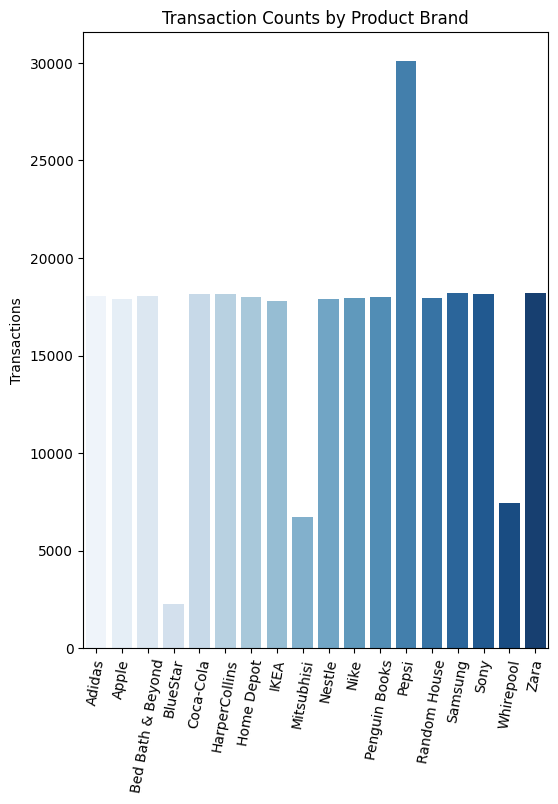

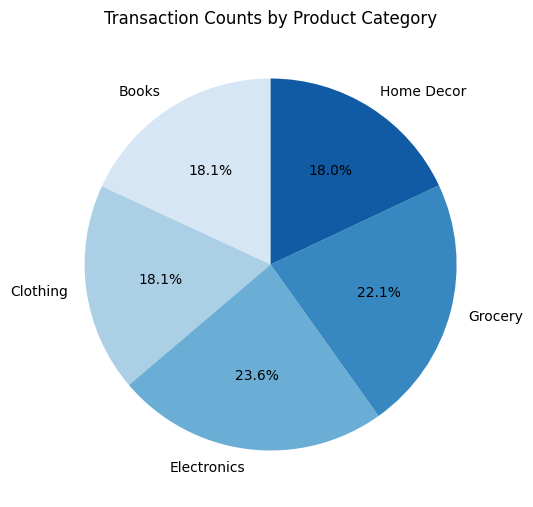

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\1223722829.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=type_count.index, x=type_count.values,


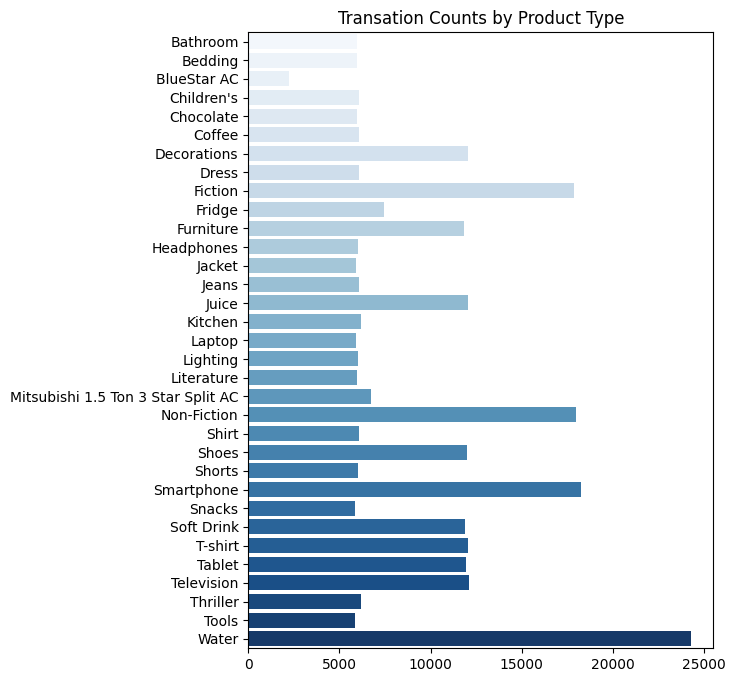

In [297]:
brand_count= product_df.groupby('Product_Brand')['Transaction_ID_new'].count()
category_count= product_df.groupby('Product_Category')['Transaction_ID_new'].count()
type_count= product_df.groupby('Product_Type')['Transaction_ID_new'].count()
# 1. Plot the bar chart: Transaction Counts by Brand
plt.figure(figsize=(6, 8))
sns.barplot(y=brand_count.values, x=brand_count.index, 
            palette="Blues")
# Set plot title and labels
plt.title('Transaction Counts by Product Brand')
plt.xlabel('')
plt.ylabel('Transactions')
plt.xticks(rotation=80)
# Show the plot
plt.show()

#2. Plot the bar chart: Transaction Counts by Category
plt.figure(figsize=(6, 8))
# Reverse the Blues palette to make the darkest color correspond to the highest value
category_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                    colors=sns.color_palette("Blues", len(category_count)))  # _r reverses the palette
# Set plot title
plt.title('Transaction Counts by Product Category')
# Hide the y-label for a cleaner look on pie charts
plt.ylabel('')
# Show the plot
plt.show()

#3. Plot the bar chart: Transaction Counts by type
plt.figure(figsize=(6, 8))
sns.barplot(y=type_count.index, x=type_count.values, 
            palette="Blues")
# Set plot title and labels
plt.title('Transation Counts by Product Type')
plt.xlabel('')
plt.ylabel('')
# Show the plot
plt.show()

As shown in the three graphs above, `Pepsi` is the most popular brand with around 30000 transactions, having the highest transaction count, while other brands remain relatively the same, except for `Blue Star`, which has the lowest transaction volume (below 2500 transaction). Regarding other brands, the number of transactions are approximately 17000.

In terms of product categories, the `electronics` category has the highest number of transactions.

For product types, `water` is the most popular choice, followed by smartphones and books (both `nonfiction` and `fiction`)

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\3394378482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=product_df, x="Product_Category", y="Ratings", split=True, palette="Blues")
C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\3394378482.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Product Brand")


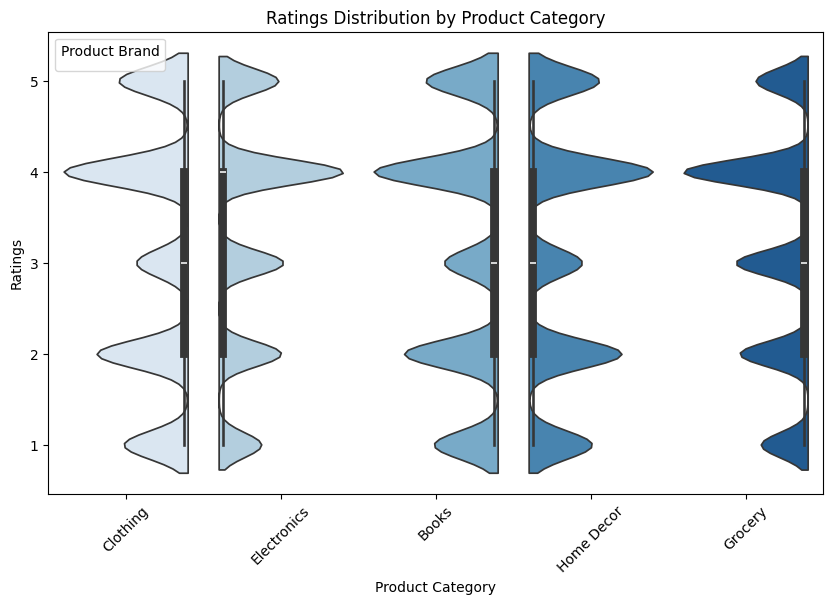

In [298]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=product_df, x="Product_Category", y="Ratings", split=True, palette="Blues")

plt.xticks(rotation=45)
plt.title("Ratings Distribution by Product Category")
plt.ylabel("Ratings")
plt.xlabel("Product Category")
plt.legend(title="Product Brand")
plt.show()

Most ratings are concentrated around 4 and 5 across all product categories. 
The most frequent ratings appear to be around 4 and 5, indicating a positive skew for most categories.
The middle black box within each violin represents the interquartile range (IQR), showing where the majority of ratings lie at 3.

Clothing & Grocery: A large portion of ratings is concentrated around 4 and 5.Some spread is seen in lower ratings (1-2), but not as significant.

Electronics: Displays a wider spread of ratings, with a more significant presence of lower ratings (1 and 2), suggesting mixed customer satisfaction.

Books & Home Decor: Shows a more uniform spread across different rating levels, indicating varied customer satisfaction.

Grocery: Ratings are mostly high (4-5) with very few low ratings, indicating strong customer satisfaction.

In other hand, Electronics and Home Decor have relatively more spread in low ratings (1-2) compared to categories like Grocery and Books.
This suggests that customers may be more critical of these product categories.

## Cohort Analysis

Before diving into Cohort Analysis, we first examine the sales trends by month and country to gain an overview of the overall sales performance.

In [299]:
# Drop null values in specific columns
# 'Transaction_ID', 'Customer_ID', 'Phone', 'Age', 'Year', 'Month', 'Ratings'
sales_df=new_retail[['Transaction_ID_new','Customer_ID', 'Age_Group','Country_new','Date','Ratings', 'Total_Amount']]
sales_df=sales_df.dropna(subset=['Customer_ID', 'Age_Group','Country_new', 'Date','Ratings', 'Total_Amount'])
sales_df['Year Month'] = pd.to_datetime(sales_df['Date']).dt.to_period('M')
sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 298104 entries, 0 to 299656
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID_new  298104 non-null  int64         
 1   Customer_ID         298104 non-null  Int64         
 2   Age_Group           298104 non-null  category      
 3   Country_new         298104 non-null  object        
 4   Date                298104 non-null  datetime64[ns]
 5   Ratings             298104 non-null  float64       
 6   Total_Amount        298104 non-null  float64       
 7   Year Month          298104 non-null  period[M]     
dtypes: Int64(1), category(1), datetime64[ns](1), float64(2), int64(1), object(1), period[M](1)
memory usage: 18.8+ MB


,Transaction_ID_new,Customer_ID,Age_Group,Country_new,Date,Ratings,Total_Amount,Year Month
0,0,37249,18-22,Germany,2023-09-18,5.0,64.83,2023-09
1,1,69749,18-22,UK,2023-12-31,4.0,161.34,2023-12
2,2,30192,35-49,Australia,2023-04-26,2.0,212.70,2023-04
3,3,62101,50-64,Canada,2023-05-08,4.0,493.36,2023-05
4,4,27901,18-22,UK,2024-01-10,1.0,49.72,2024-01


**Sales Trend By Month**

In [300]:
#Calculate sales amount by month and year 
sales_amount = sales_df.groupby(['Year Month'])['Total_Amount'].sum().reset_index()
#Rename column
sales_amount.rename(columns={'Total_Amount': 'Total Amount'}, inplace=True)
# Sort values by ascending order of year and month
sales_amount.sort_values(by=['Year Month'])

,Year Month,Total Amount
0,2023-03,6975678.70
1,2023-04,6745636.83
2,2023-05,6822815.75
3,2023-06,6673370.50
4,2023-07,6893905.63
5,2023-08,6963261.76
6,2023-09,6708264.94
7,2023-10,6846228.21
8,2023-11,6670773.70
9,2023-12,6860552.06


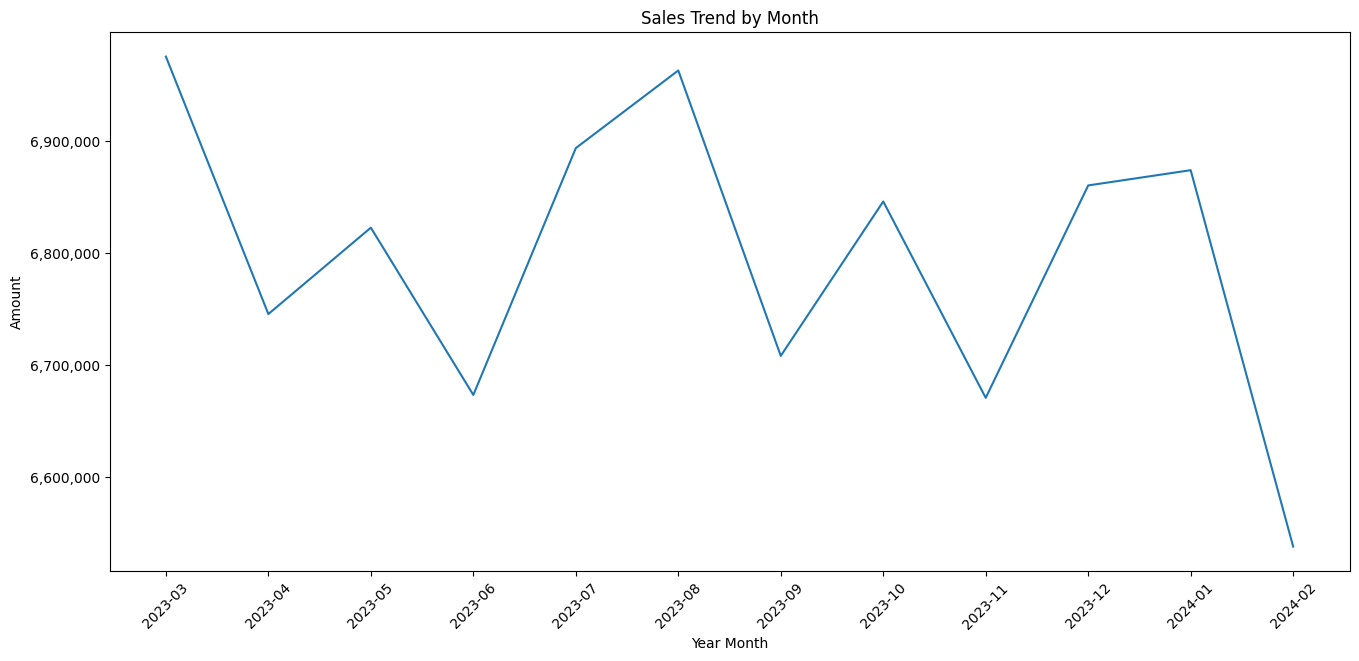

In [301]:

from matplotlib.ticker import FuncFormatter
sales_amount['Year Month'] = sales_amount['Year Month'].astype(str)
# Plotting
plt.figure(figsize=(16, 7))

sns.lineplot(x='Year Month', y='Total Amount', data=sales_amount)

# Format the y-axis to display real numbers with commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Labels and title
plt.xlabel('Year Month')
plt.ylabel('Amount')
plt.title('Sales Trend by Month')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Peak months for sales: Aug-Sep and Dec-Jan and sales ranging from 6,800,000 to more than 6,900,000 
Months having lowest sales: Jun and Nov
Compare these trends with external events such as holidays (e.g., Christmas, New Year for Dec-Jan peaks), Black Friday, or back-to-school periods in Aug-Sep. We can look for correlations between these events and the spikes in sales.

**Sales Trend By Country**

In [302]:
# Matrix by Country 
sales_df['Country_new'] = sales_df['Country_new'].replace({
    'United States':'USA' ,
    'United States of America': 'USA'
})
sales_df['Country_new'] = sales_df['Country_new'].replace({
    'United Kingdom': 'UK'
})

sales_country=sales_df.groupby(['Year Month','Country_new'])['Total_Amount'].sum()
sales_country=pd.DataFrame(sales_country).reset_index()
sales_country.head()

,Year Month,Country_new,Total_Amount
0,2023-03,Australia,697066.91
1,2023-03,Canada,715551.72
2,2023-03,Germany,1252183.07
3,2023-03,UK,2290467.96
4,2023-03,USA,2020409.04


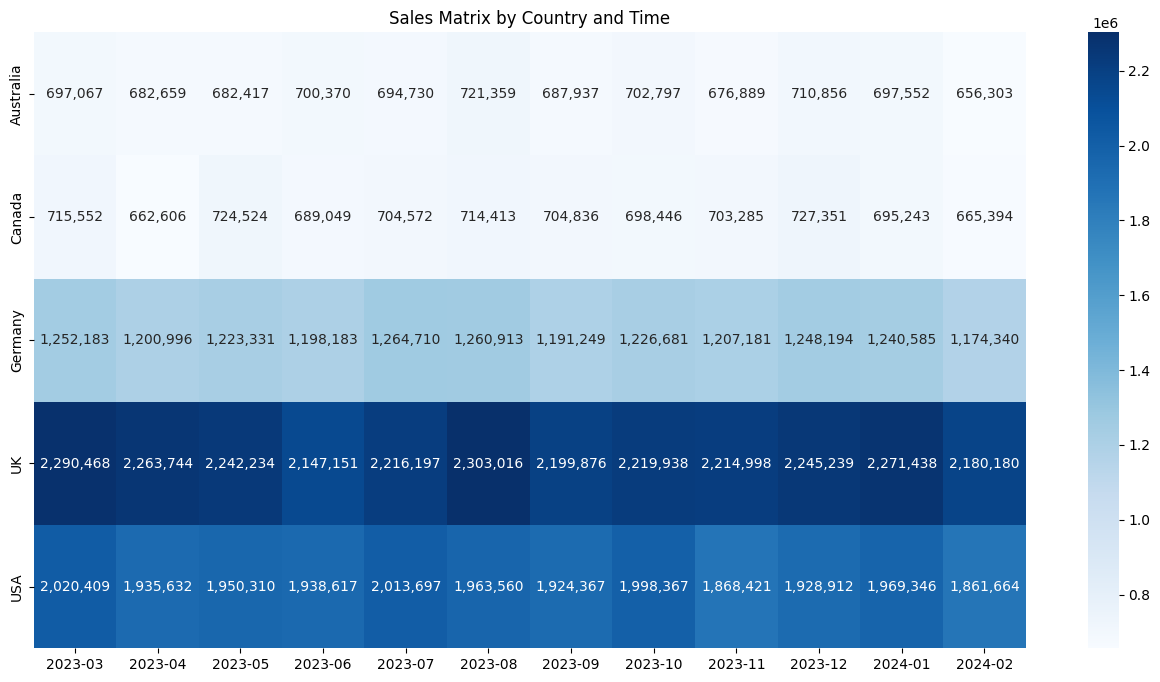

In [303]:
sales_matrix = sales_country.pivot(index='Country_new', columns='Year Month', values='Total_Amount')
# Plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(sales_matrix, cmap='Blues', annot=True, fmt=',.0f')
plt.title('Sales Matrix by Country and Time')
plt.xlabel('')  # Label x-axis as 'Year-Month'
plt.ylabel('')  # Label y-axis as 'Country'
plt.show()

In above matrix, UK and US is the top 2 country having the highest sales amount.

The UK maintaining high sales every month with a peak in August suggests strong, consistent demand every month (sales amount reaches at more than 2,000,000) while the US sees peak sales in March and July, which might be linked to seasonal trends or specific events.

**Cohort Analysis**
+ Time-based: Calculate the number of customers and the retention rate after their first purchase month.

+ Behavior-based: Focus on specific customer behaviors and filter customers who made purchases in different months after their first purchase month (Cohort Month).

+ Demographic-based: Analyze customer behavior by age group by calculating the total number of customers in each Cohort Month and tracking changes in customer numbers over time, comparing each month’s data to the previous month within the same Cohort Month.

***1. Time based Cohort Analysis***

In [304]:
# find the first Year Month customer bought `Cohort Month`
sales_df['Cohort Month']=sales_df.groupby('Customer_ID')['Year Month'].transform(min)

# calculate the number of months between Cohort Month and Year Month
sales_df['Cohort Index'] = (sales_df['Year Month'] - sales_df['Cohort Month']).apply(lambda x: x.n)

sales_df.head()

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\4056802900.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sales_df['Cohort Month']=sales_df.groupby('Customer_ID')['Year Month'].transform(min)


,Transaction_ID_new,Customer_ID,Age_Group,Country_new,Date,Ratings,Total_Amount,Year Month,Cohort Month,Cohort Index
0,0,37249,18-22,Germany,2023-09-18,5.0,64.83,2023-09,2023-06,3
1,1,69749,18-22,UK,2023-12-31,4.0,161.34,2023-12,2023-05,7
2,2,30192,35-49,Australia,2023-04-26,2.0,212.70,2023-04,2023-04,0
3,3,62101,50-64,Canada,2023-05-08,4.0,493.36,2023-05,2023-05,0
4,4,27901,18-22,UK,2024-01-10,1.0,49.72,2024-01,2023-07,6


In [305]:
# Count the customer_ID by Cohort Month
time_based=sales_df.groupby(['Cohort Month','Cohort Index'])['Customer_ID'].nunique()
time_based=pd.DataFrame(time_based).reset_index()

# create pivot table
time_based_table=time_based.pivot(index='Cohort Month', columns=['Cohort Index'], values='Customer_ID')
time_based_table

Cohort Index,0,1,2,3,4,5,6,7,8,9,10,11
Cohort Month,,,,,,,,,,,,
2023-03,22044.0,5153.0,5315.0,5282.0,5404.0,5389.0,5251.0,5312.0,5282.0,5335.0,5419.0,5112.0
2023-04,16257.0,3886.0,3936.0,4054.0,4048.0,3821.0,3965.0,3829.0,3913.0,3921.0,3820.0,NaN
2023-05,12562.0,2917.0,3110.0,3058.0,3071.0,3103.0,2977.0,3095.0,3122.0,2914.0,NaN,NaN
2023-06,9267.0,2217.0,2189.0,2210.0,2298.0,2147.0,2270.0,2249.0,2152.0,NaN,NaN,NaN
2023-07,7228.0,1759.0,1782.0,1774.0,1647.0,1739.0,1772.0,1657.0,NaN,NaN,NaN,NaN
2023-08,5544.0,1289.0,1379.0,1346.0,1262.0,1399.0,1303.0,NaN,NaN,NaN,NaN,NaN
2023-09,4007.0,978.0,925.0,970.0,962.0,953.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,3236.0,747.0,831.0,841.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11,2353.0,600.0,586.0,539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


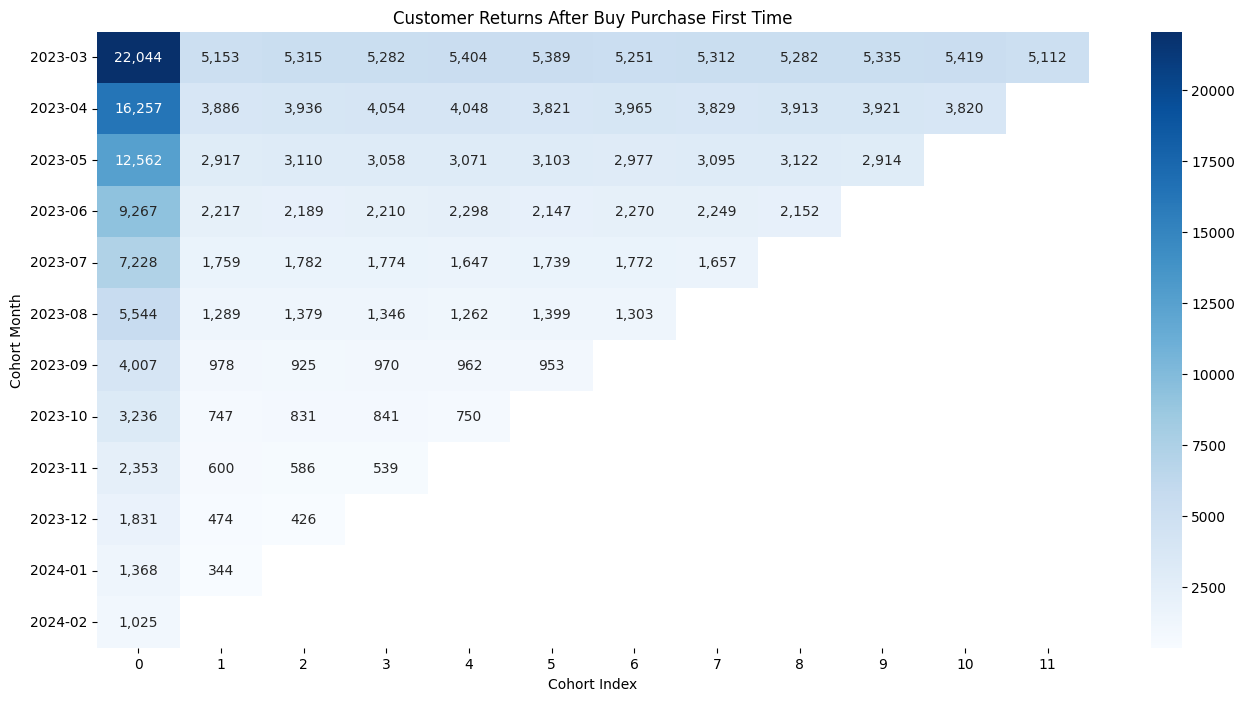

In [306]:
# Visualize in heatmap
plt.figure(figsize=(16, 8))

# Plot the heatmap with annotations and values in thousands
sns.heatmap(time_based_table, annot=True, fmt=",.0f", cmap='Blues')

plt.title("Customer Returns After Buy Purchase First Time")
plt.show()

Customer Acquisition Trends:

In March 2023, the highest number of first-time customers, with over 22,000 new customers making their first purchase.

February 2024: The lowest number of first-time customers, with just over 1,000 new customers, which is only 0.5% of the March 2023 acquisition.
While acquisition numbers provide insight into new customer trends, customer retention rate is crucial to understand how many of these first-time customers continue making purchases over time.Evaluating percentage retention over months will show the true long-term value of acquired customers.

In [307]:
# create table for percentage 
time_based_table_pct=(time_based_table).divide(time_based_table.iloc[:,0], axis=0)
time_based_table_pct

Cohort Index,0,1,2,3,4,5,6,7,8,9,10,11
Cohort Month,,,,,,,,,,,,
2023-03,1.0,0.233760,0.241109,0.239612,0.245146,0.244466,0.238205,0.240973,0.239612,0.242016,0.245827,0.2319
2023-04,1.0,0.239035,0.242111,0.249370,0.249000,0.235037,0.243895,0.235529,0.240696,0.241188,0.234976,NaN
2023-05,1.0,0.232208,0.247572,0.243433,0.244467,0.247015,0.236985,0.246378,0.248527,0.231969,NaN,NaN
2023-06,1.0,0.239236,0.236215,0.238481,0.247977,0.231682,0.244955,0.242689,0.232222,NaN,NaN,NaN
2023-07,1.0,0.243359,0.246541,0.245434,0.227864,0.240592,0.245158,0.229247,NaN,NaN,NaN,NaN
2023-08,1.0,0.232504,0.248737,0.242785,0.227633,0.252345,0.235029,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.244073,0.230846,0.242076,0.240080,0.237834,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,1.0,0.230841,0.256799,0.259889,0.231768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11,1.0,0.254994,0.249044,0.229069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


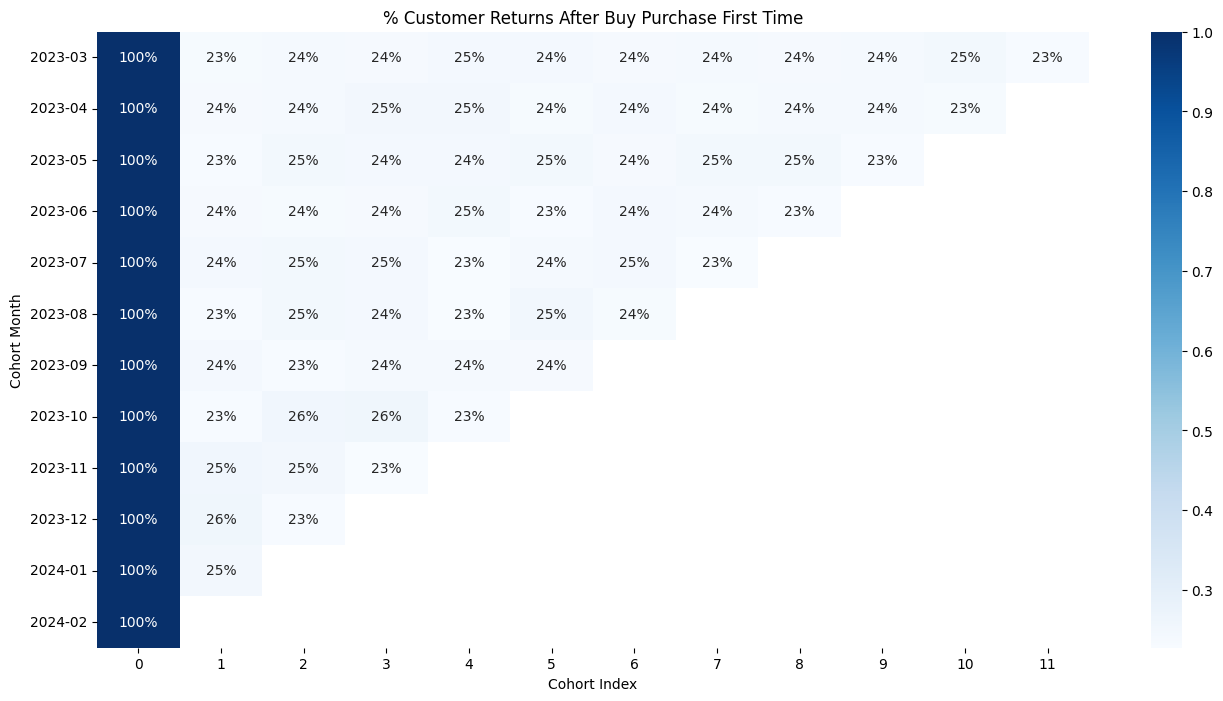

In [308]:
# Visualize in heatmap
plt.figure(figsize=(16, 8))

# Plot the heatmap with annotations and values in thousands
sns.heatmap(time_based_table_pct, annot=True, fmt=",.0%", cmap='Blues')

plt.title('% Customer Returns After Buy Purchase First Time')
plt.show()

As seen in the graph, the customer retention rate is over 20%. Notably, for customers who made their first purchase in October 2023, the retention rate is the highest after 2 or 3 months. However, there is no significant difference in the retention rate over the period.

***Behavior-Based Cohort Analysis***

In this analysis, we will focus on customers having specific behaviors: only customer buying products in different months after the first purchase month.

We will calculate the number of the customers having this behavior and calculate customer retention rate for this behavior-based group.

In [309]:
sales_df['Month'] = sales_df['Date'].dt.month
#group by Month and Customer_ID, calculate transaction counts
behavior_cohort=sales_df.groupby(['Customer_ID','Month'])['Transaction_ID_new'].count().reset_index()\

# behavior_cohort_1: From behavior_cohort, group by Customer_ID, calculate the number of unique months
behavior_cohort_1=behavior_cohort.groupby('Customer_ID').count()

#Filter behavior_cohort_1 with the the number of unique months
behavior_cohort_2=behavior_cohort_1[behavior_cohort_1['Month']>1].reset_index()
# Get customer_ID from behavior_cohort_2 to create filtered dataframe for analysis
id_filtered=behavior_cohort_2['Customer_ID']
behavior_filtered=sales_df[sales_df['Customer_ID'].isin(id_filtered)]
behavior_filtered

,Transaction_ID_new,Customer_ID,Age_Group,Country_new,Date,Ratings,Total_Amount,Year Month,Cohort Month,Cohort Index,Month
0,0,37249,18-22,Germany,2023-09-18,5.0,64.83,2023-09,2023-06,3,9
1,1,69749,18-22,UK,2023-12-31,4.0,161.34,2023-12,2023-05,7,12
2,2,30192,35-49,Australia,2023-04-26,2.0,212.70,2023-04,2023-04,0,4
3,3,62101,50-64,Canada,2023-05-08,4.0,493.36,2023-05,2023-05,0,5
4,4,27901,18-22,UK,2024-01-10,1.0,49.72,2024-01,2023-07,6,1
...,...,...,...,...,...,...,...,...,...,...,...
299652,299652,96551,23-34,UK,2023-10-25,5.0,535.26,2023-10,2023-04,6,10
299653,299653,35598,18-22,UK,2023-10-15,2.0,312.70,2023-10,2023-03,7,10
299654,299654,25148,18-22,UK,2023-04-17,1.0,38.71,2023-04,2023-04,0,4
299655,299655,64906,18-22,Canada,2023-04-16,2.0,830.80,2023-04,2023-03,1,4


In [310]:
behavior_cohort= behavior_filtered.groupby(['Cohort Month', 'Year Month'])['Customer_ID'].nunique().reset_index()
# Pivot the table to get cohorts as rows and order months as columns
behavior_pivot = behavior_cohort.pivot_table(index='Cohort Month', columns='Year Month', values='Customer_ID')
behavior_pivot

Year Month,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02
Cohort Month,,,,,,,,,,,,
2023-03,21004.0,5153.0,5315.0,5282.0,5404.0,5389.0,5251.0,5312.0,5282.0,5335.0,5419.0,5112.0
2023-04,NaN,15191.0,3886.0,3936.0,4054.0,4048.0,3821.0,3965.0,3829.0,3913.0,3921.0,3820.0
2023-05,NaN,NaN,11507.0,2917.0,3110.0,3058.0,3071.0,3103.0,2977.0,3095.0,3122.0,2914.0
2023-06,NaN,NaN,NaN,8169.0,2217.0,2189.0,2210.0,2298.0,2147.0,2270.0,2249.0,2152.0
2023-07,NaN,NaN,NaN,NaN,6163.0,1759.0,1782.0,1774.0,1647.0,1739.0,1772.0,1657.0
2023-08,NaN,NaN,NaN,NaN,NaN,4469.0,1289.0,1379.0,1346.0,1262.0,1399.0,1303.0
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,2987.0,978.0,925.0,970.0,962.0,953.0
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2155.0,747.0,831.0,841.0,750.0
2023-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1334.0,600.0,586.0,539.0


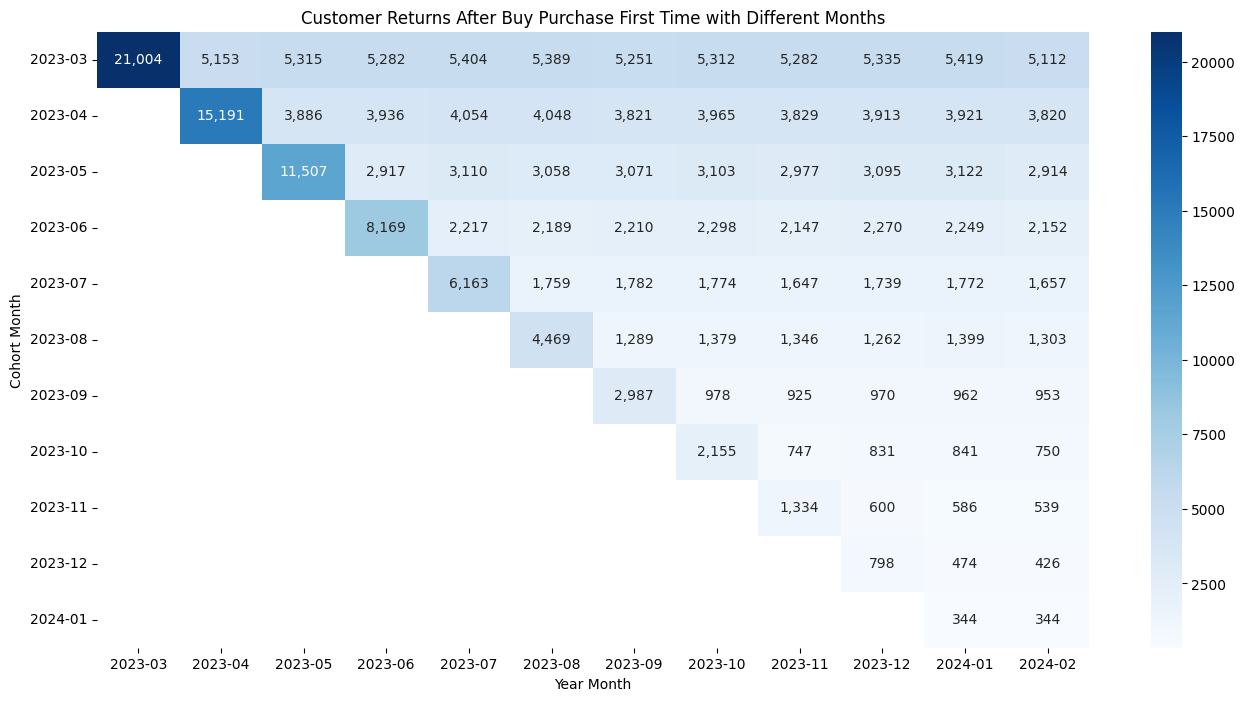

In [311]:
#Visualization:
# Visualize in heatmap
plt.figure(figsize=(16, 8))

# Plot the heatmap with annotations and values in thousands
sns.heatmap(behavior_pivot, annot=True, fmt=",.0f", cmap='Blues')

plt.title("Customer Returns After Buy Purchase First Time with Different Months")
plt.show()

For these customers, the highest number was in March 2023, while the lowest was in January 2024. However, the percentage of customers in January 2024 accounts for only 1.6% compared to March 2023.

We will further evaluate the customer retention rate based on specific behaviors to gain deeper insights.

In [312]:
# create table for percentage 
behavior_pivot_pct=(behavior_pivot).divide(time_based_table.iloc[:,0], axis=0)

list_cohort_size = []
for i in range (len(behavior_pivot)):
# Calculate the retention rate
    cohort_size_month = behavior_pivot.iloc[i,i]
    list_cohort_size.append(cohort_size_month)

# Calculate retention rate
behavior_retention_rate = behavior_pivot.divide(list_cohort_size, axis=0)
behavior_retention_rate


Year Month,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02
Cohort Month,,,,,,,,,,,,
2023-03,1.0,0.245334,0.253047,0.251476,0.257284,0.256570,0.250000,0.252904,0.251476,0.253999,0.257998,0.243382
2023-04,NaN,1.000000,0.255809,0.259101,0.266869,0.266474,0.251531,0.261010,0.252057,0.257587,0.258113,0.251465
2023-05,NaN,NaN,1.000000,0.253498,0.270270,0.265751,0.266881,0.269662,0.258712,0.268967,0.271313,0.253237
2023-06,NaN,NaN,NaN,1.000000,0.271392,0.267964,0.270535,0.281307,0.262823,0.277880,0.275309,0.263435
2023-07,NaN,NaN,NaN,NaN,1.000000,0.285413,0.289145,0.287847,0.267240,0.282168,0.287522,0.268863
2023-08,NaN,NaN,NaN,NaN,NaN,1.000000,0.288431,0.308570,0.301186,0.282390,0.313045,0.291564
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.327419,0.309675,0.324741,0.322062,0.319049
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.346636,0.385615,0.390255,0.348028
2023-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.449775,0.439280,0.404048


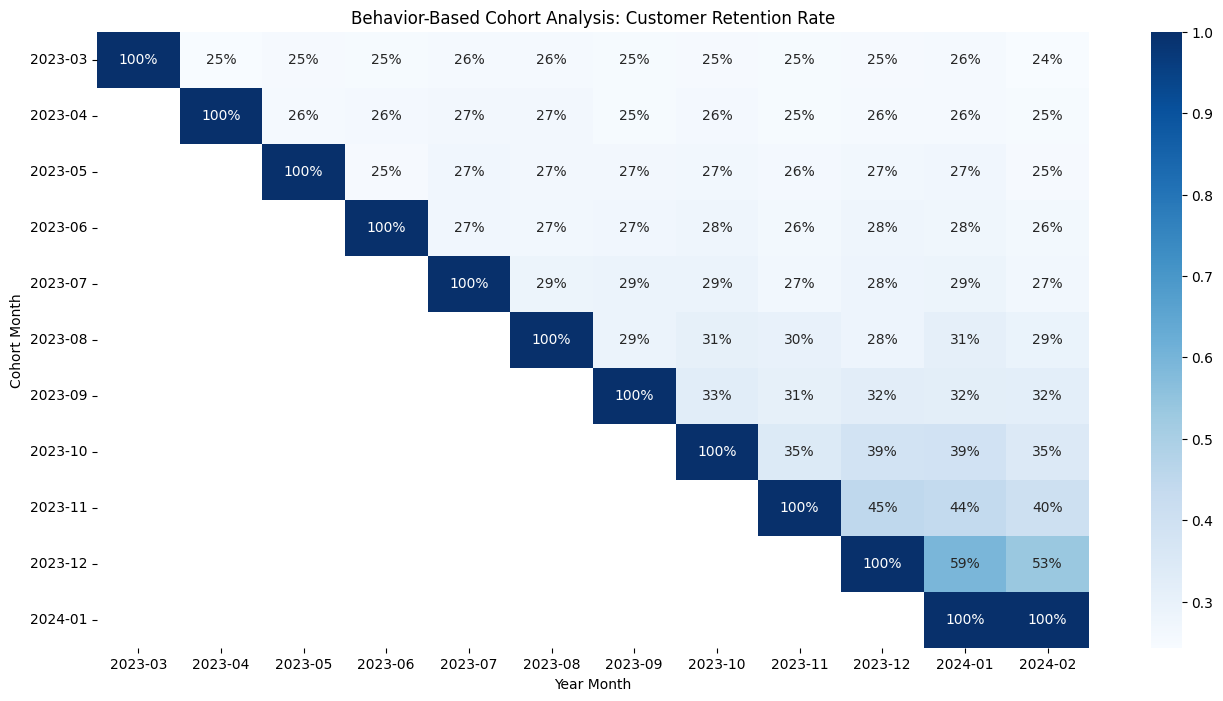

In [313]:
# Visualize in heatmap
plt.figure(figsize=(16, 8))

# Plot the heatmap with annotations and values in thousands
sns.heatmap(behavior_retention_rate, annot=True, fmt=",.0%", cmap='Blues')

plt.title('Behavior-Based Cohort Analysis: Customer Retention Rate')
plt.show()

Despite the decline in new customers, customer retention has improved over time.
The latest retention rate reached 59%, indicating that a higher percentage of customers are making repeat purchases in different months after the first time purchase. We can see the potential customers by offering seasonal products


### Demographic-Based Cohort Analysis
In this analysis, we will focus on age group:`0-17`, `18-22`, `23-34`, `35-49`, `50-64`, `Above 65`, `Unknown`

In [314]:
# Group by Age_Group and Cohort Month (first month of purchase) to count unique customers 
age_filtered=sales_df.groupby(['Age_Group','Cohort Month'])['Customer_ID'].nunique().reset_index()
age_pivot=age_filtered.pivot_table(index='Age_Group', columns='Cohort Month', values='Customer_ID')
age_pivot=age_pivot.iloc[1:]
age_pivot

C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\2852401822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_filtered=sales_df.groupby(['Age_Group','Cohort Month'])['Customer_ID'].nunique().reset_index()
C:\Users\lemin\AppData\Local\Temp\ipykernel_32172\2852401822.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_pivot=age_filtered.pivot_table(index='Age_Group', columns='Cohort Month', values='Customer_ID')


Cohort Month,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02
Age_Group,,,,,,,,,,,,
18-22,13370.0,9503.0,7291.0,5170.0,3744.0,2789.0,1859.0,1446.0,979.0,702.0,468.0,327.0
23-34,4887.0,3718.0,2854.0,2192.0,1808.0,1395.0,1052.0,849.0,636.0,549.0,406.0,300.0
35-49,2757.0,2195.0,1696.0,1349.0,1146.0,896.0,704.0,609.0,476.0,351.0,273.0,232.0
50-64,778.0,619.0,533.0,423.0,387.0,346.0,305.0,243.0,195.0,179.0,151.0,124.0
Above 65,250.0,221.0,185.0,129.0,142.0,115.0,87.0,87.0,65.0,50.0,69.0,42.0
Unknown,2.0,1.0,3.0,4.0,1.0,3.0,0.0,2.0,2.0,0.0,1.0,0.0


In [315]:
# Initialize a DataFrame to store the cohort analysis
cohort_analysis = pd.DataFrame()
for age_group in age_pivot.index:
    # Create a new DataFrame for the specific age group
    age_group_cohort = pd.DataFrame(index=age_pivot.columns, columns=age_pivot.columns)
    for i, cohort_month in enumerate(age_pivot.columns):
        # Filter customers from the same cohort month and age group
        age_detail = sales_df[(sales_df['Cohort Month'] == cohort_month) & (sales_df['Age_Group'] == age_group)]
        for j, analysis_month in enumerate(age_pivot.columns[i:]):
            if j == 0:
                # First month: take the total unique customers in Cohort Month
                age_group_cohort.loc[cohort_month, analysis_month] = age_table.loc[age_group, analysis_month]
            else:
                #Value at previous analysis_month with the same Cohort Month as current analysis_month
                prev_count = age_detail[age_detail['Cohort Index'] == (j-1)]['Customer_ID'].nunique()
                #Value at analysis_month with the same Cohort Month as previous month
                curr_count = age_detail[age_detail['Cohort Index'] == j]['Customer_ID'].nunique()

                # Compute the difference in unique customers
                age_group_cohort.at[cohort_month, analysis_month] = curr_count - prev_count  
    # Name the DataFrame as per age group
    age_group_cohort.name = age_group
    # Store the cohort DataFrame in the final analysis
    cohort_analysis = pd.concat([cohort_analysis, age_group_cohort], axis=0)
cohort_analysis=pd.DataFrame(cohort_analysis)
cohort_analysis

Cohort Month,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02
Cohort Month,,,,,,,,,,,,
2023-03,13370.0,-9896,29,-24,115,-15,-59,37,3,12,26,-206
2023-04,NaN,9503.0,-6961,-2,48,82,-167,102,-98,41,12,-35
2023-05,NaN,NaN,7291.0,-5400,90,-28,-1,45,-55,97,-52,-104
2023-06,NaN,NaN,NaN,5170.0,-3790,22,9,28,-112,131,-69,-51
2023-07,NaN,NaN,NaN,NaN,3744.0,-2685,6,-29,-26,26,34,-75
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-1,-1,1,-1
2023-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-2,0,0
2023-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0


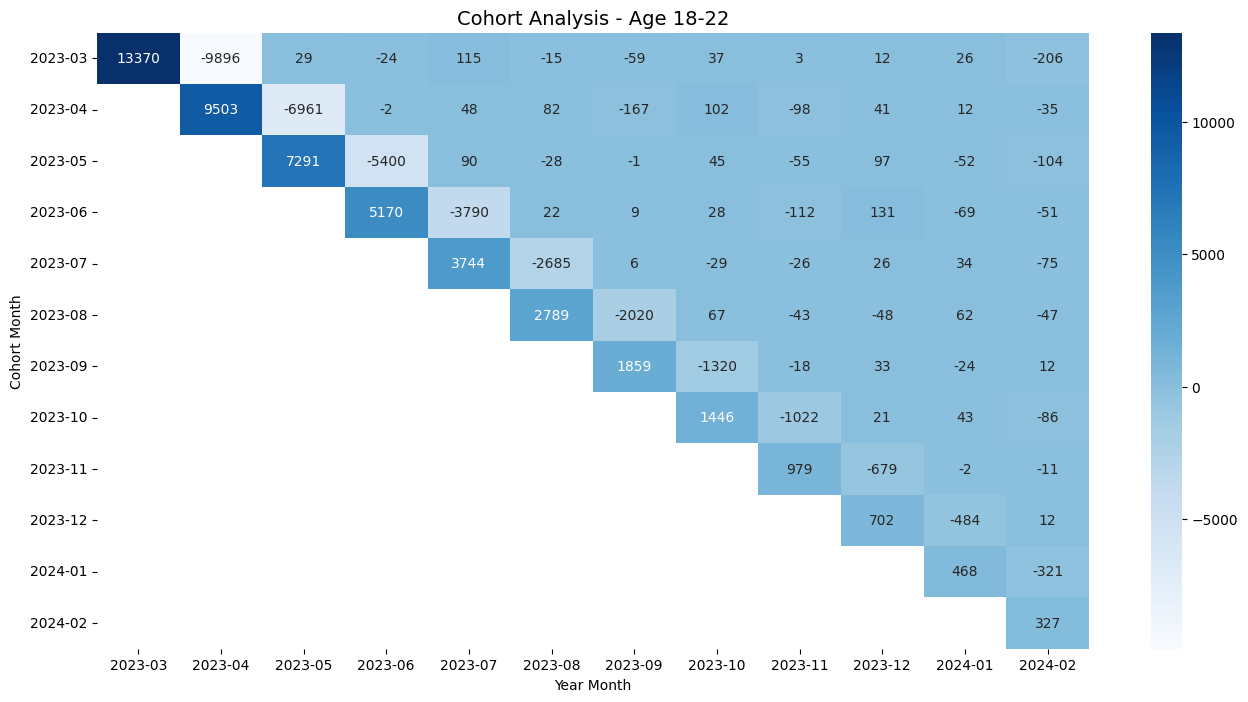

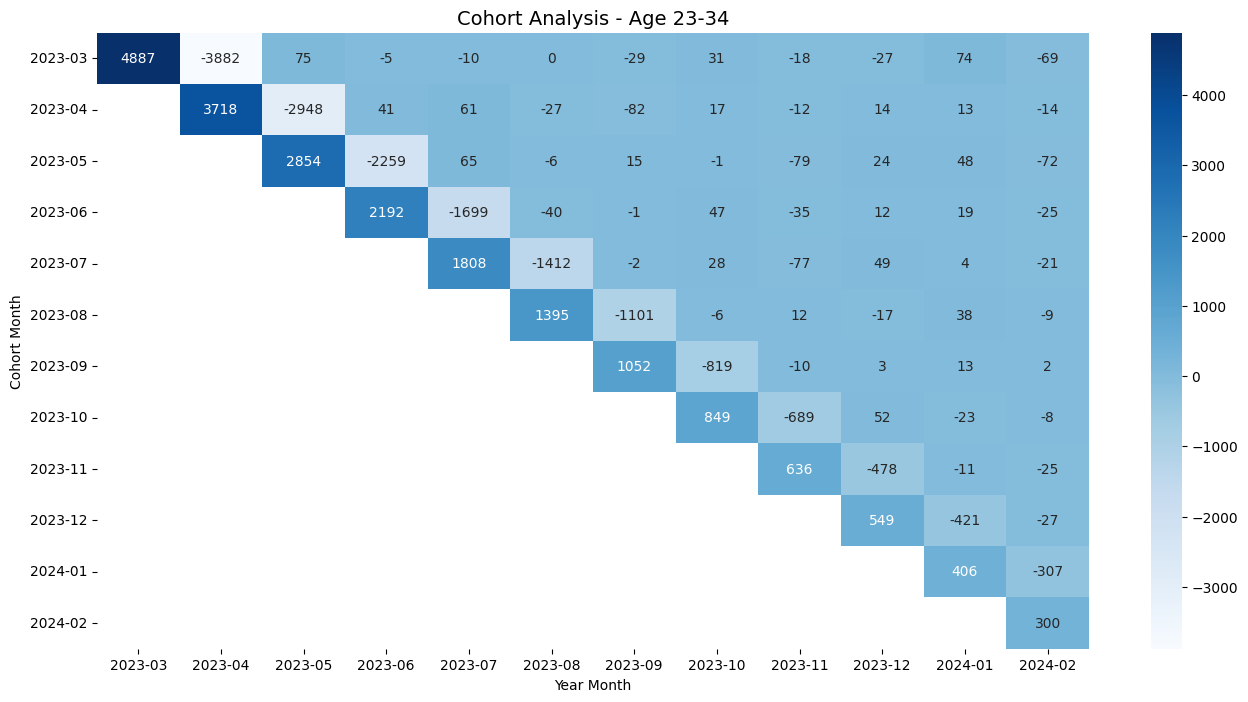

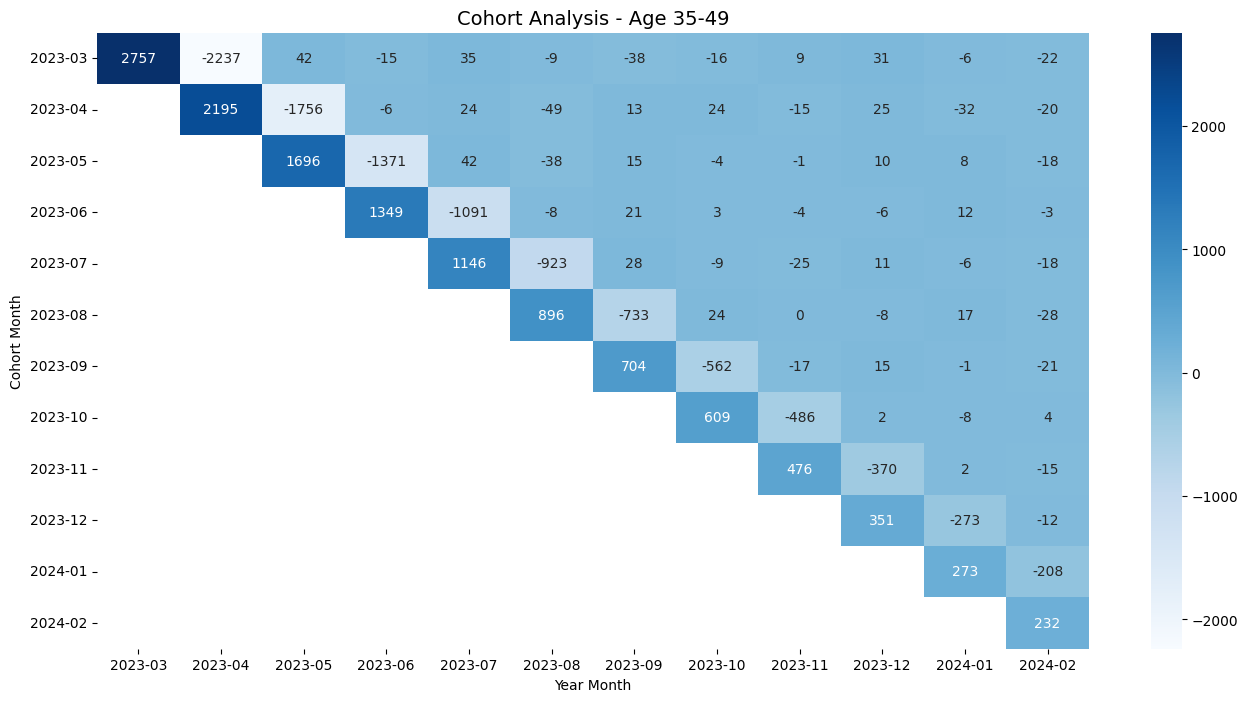

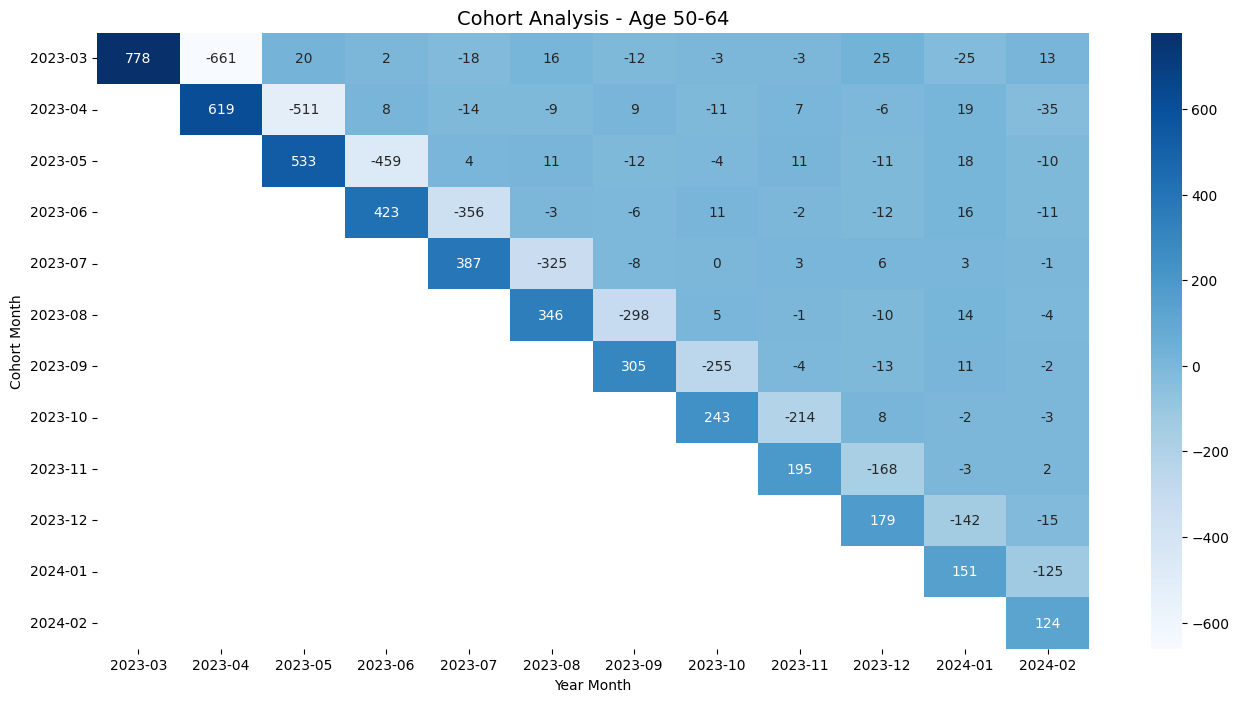

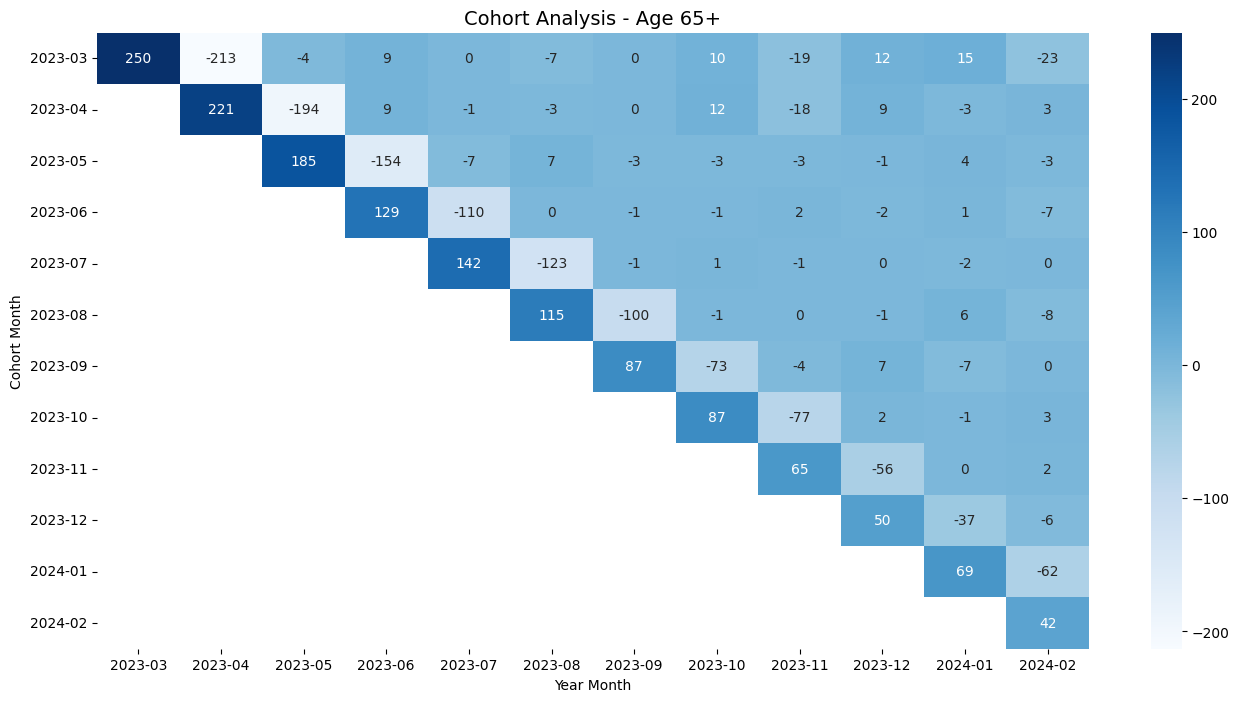

In [316]:
age_18_22=cohort_analysis.iloc[:12]
age_23_34=cohort_analysis.iloc[12:24]
age_35_49=cohort_analysis.iloc[24:36]
age_50_64=cohort_analysis.iloc[36:48]	
age_above_65=cohort_analysis.iloc[48:60]
# Function to plot heatmap for each age group
def plot_heatmap(data, title):
    plt.figure(figsize=(16, 8))
    sns.heatmap(data.astype(float), cmap="Blues", annot=True, fmt=".0f")
    plt.title(title, fontsize=14)
    plt.xlabel("Year Month")
    plt.ylabel("Cohort Month")
    plt.show()

# Plot heatmaps for each age group
plot_heatmap(age_18_22, "Cohort Analysis - Age 18-22")
plot_heatmap(age_23_34, "Cohort Analysis - Age 23-34")
plot_heatmap(age_35_49, "Cohort Analysis - Age 35-49")
plot_heatmap(age_50_64, "Cohort Analysis - Age 50-64")
plot_heatmap(age_above_65, "Cohort Analysis - Age 65+")

+ Age Group 18-22:

The highest number of customers making their first purchase was recorded in March 2023.

There was a sharp decline in customer numbers in April 2023, with a drop of more than 9,896 customers compared to March.

The largest increase occurred in December 2023, with 131 more customers compared to the previous month.

Recent months show a consistent decline in customer numbers compared to the previous month.

+ Age Group 23-34:

Similar to the 23-34 age group, the highest customer acquisition was in March 2023.

The largest monthly changes in customer numbers occurred in May 2023 and January 2024.

A sharp decline in customers was observed in April and May 2025, following a similar pattern to the 18-22 age group.

These insights suggest that March 2023 was a peak acquisition period, followed by sharp declines in the following months. Further analysis can help identify seasonal trends or marketing factors influencing customer retention and drop-offs.

## Recommendations:

1. Enhance Customer Retention Efforts
Loyalty Programs: Since retention has improved over time, introducing a loyalty or rewards program can further encourage repeat purchases.

Personalized Offers: Provide targeted promotions to March 2023 customers to keep them engaged.

Seasonal Promotions: Since declines happen after peak months, running exclusive post-peak discounts could help maintain engagement.

2. Improve First-Time Customer Acquisition

March Marketing Strategy: Since March is the strongest acquisition month, analyze what marketing campaigns were most effective and replicate them.

Increase Engagement in Low Months: Focus on attracting new customers in January and February, the weakest months.

3. Leverage Demographic Insights

  + 18-22 Age Group:
Appeal to younger consumers through social media marketing and influencer partnerships.
Create student discounts or limited-time offers in months with sharp declines.

   + 23-34 Age Group:
Focus on subscription models or bundled discounts to encourage repeat purchases.
Understand why april and May 2025 had a large drop and adjust campaigns accordingly.

4. Behavior-Based Cohort Analysis

Focus on customers who buy products across different months to offer seasonal products.

Segment these customers and track their retention to optimize marketing for high-value buyers.

Evaluate cross-selling opportunities to encourage repeat purchases.


## Limitations
1. Assumptions for Data Cleaning

Data cleaning is performed based on our assumptions to ensure consistency and reliability for further analysis.
Some data points may require standardization or filtering to align with the objectives of the cohort analysis.
Handling missing or inconsistent values is crucial to maintain the accuracy of insights.

2. Data Collection & Accuracy

To improve the reliability of cohort analysis, data should be collected over a longer period to capture trends and seasonality.
Expanding the dataset will enhance the statistical significance and generalizability of the findings.
Customer behavior and age group segmentation should be refined further by considering specific characteristics, such as purchase frequency, spending patterns, and engagement levels.

3. Cohort Analysis Considerations

A longer data collection period is essential to assess customer retention trends and evaluate the long-term value of different cohorts.
The analysis currently relies on a sample dataset, which may contain inconsistencies and noise. Future iterations should focus on cleaning and structuring the dataset more effectively.
Further segmentation of customer cohorts based on behavior and demographic insights will provide a more granular view of retention patterns.
